In [1772]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, mode
import numpy as np

sns.set()
pd.set_option('display.max_rows', 450)  # показывать больше строк
pd.set_option('display.max_columns', 150)  # показывать больше колонок

In [1773]:
df = pd.read_csv('stud_math.csv')

In [1774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [1775]:
df.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [1776]:
df['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Датасет имеет 395 строк и 30 столбцов(13 числовых и 17 строковых), один из числовых столбцов(studytime, granular) представляет собой набор непонятных отрицательных значений и не описан в справочной информации к этому набору данных, поэтому далее мы убираем его:

In [1777]:
df.drop(['studytime, granular'], axis=1, inplace=True)

Посмотрим на долю всех пропущенных значений датасета:

In [1778]:
df.isna().sum().sum() / (len(df) * 29)

0.04871235268441729

Заметно, что почти 5% зачений пропущены. Можем избавиться от строк, имеющих 3 и более пропусков.

In [1779]:
df.dropna(thresh=26, axis=0, inplace=True)

Приступим к рассмотрению каждого столбца по отдельности:

In [1780]:
df.school.value_counts(dropna=False)

GP    331
MS     44
Name: school, dtype: int64

В столбце информация о двух школах, без пустых значений

In [1781]:
df.sex.value_counts(dropna=False)

F    201
M    174
Name: sex, dtype: int64

Пол также не имеет пустых значений

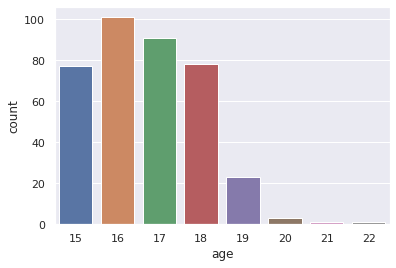

In [1782]:
sns.countplot(df.age)

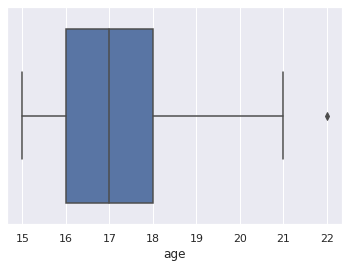

In [1783]:
sns.boxplot(df['age'])

In [1784]:
df.age.value_counts(dropna=False)

16    101
17     91
18     78
15     77
19     23
20      3
22      1
21      1
Name: age, dtype: int64

Столбец возраста распределен нормально со смещением вправо, пустые значения отсутствуют.
На графике значение 22 отмечается как выброс, но по условию это значение вполне допустимо 

In [1785]:
df.address.value_counts(dropna=False)

U      281
R       79
NaN     15
Name: address, dtype: int64

В столбце присутствуют два различных значения и имеются 15 пропусков, заметно что большинство учеников живут в городе.

In [1786]:
df.famsize.value_counts(dropna=False)

GT3    251
LE3    101
NaN     23
Name: famsize, dtype: int64

В этом столбце также два различных значения и уже 23 пропусков, большинство учеников имеют семьи более 3 человек.

In [1787]:
df.Pstatus.value_counts(dropna=False)

T      305
NaN     36
A       34
Name: Pstatus, dtype: int64

Столбец имеет большое количество пропусков: 36, и в подавляющем большинстве родители учеников живут совместно.

In [1788]:
df.Medu.value_counts(dropna=False)

4.0    124
2.0     94
3.0     94
1.0     58
0.0      3
NaN      2
Name: Medu, dtype: int64

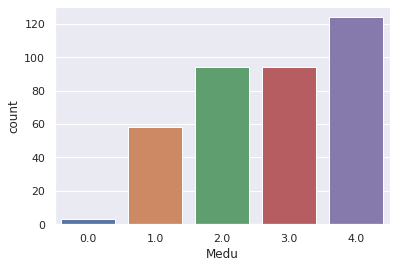

In [1789]:
sns.countplot(df.Medu)

Все значения лежат в разумных пределах, имеется 2 пропуска. Также можно сделать вывод, что большинство матерей имеют образование на уровне и выше полного школьного или среднего специального

In [1790]:
df.Fedu.value_counts(dropna=False)

2.0     96
3.0     92
4.0     88
1.0     76
NaN     20
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [1791]:
df = df.loc[(df.Fedu <= 4) | pd.isnull(df.Fedu)]

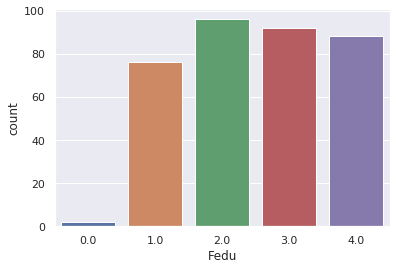

In [1792]:
sns.countplot(df.Fedu)


В этом столбце присутствует один выброс, который не укладывается в диапазон возможных ответов, его можно было бы принять за опечатку в написании числа 4, но мы не можем быть уверенным в этом наверняка и лучше удалить эту строку. Так же есть 20 пропусков. Можно сделать вывод, что расклад с образованием отцов хуже чем у матерей и примерно половина не получила полное школьное либо среднее специальное образование.

In [1793]:
df.Mjob.value_counts(dropna=False)

other       127
services     91
at_home      56
teacher      54
health       30
NaN          16
Name: Mjob, dtype: int64

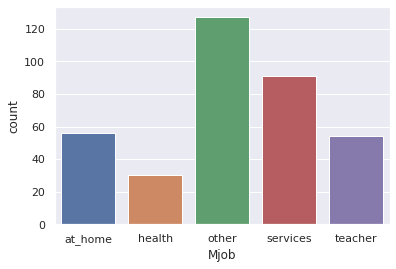

In [1794]:
sns.countplot(df.Mjob)

В столбце работа матери присутствуют 16 пропусков, достаточно много матерей без работы.

In [1795]:
df.Fjob.value_counts(dropna=False)

other       187
services     99
teacher      29
NaN          28
at_home      16
health       15
Name: Fjob, dtype: int64

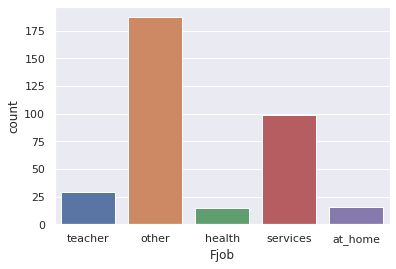

In [1796]:
sns.countplot(df.Fjob)

В столбце работа отца присутствуют 28 пустых значений, безработных среди отцов уже на порядок меньше.

In [1797]:
df.reason.value_counts(dropna=False)

course        134
home           98
reputation     96
other          31
NaN            15
Name: reason, dtype: int64

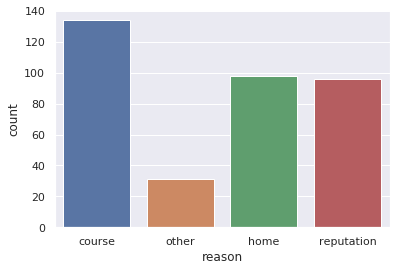

In [1798]:
sns.countplot(df.reason)

Большинство выбирает школу исходя из качества ее образовательной программы, также столбец содержит 15 пустых значений.

In [1799]:
df.guardian.value_counts(dropna=False)

mother    239
father     78
NaN        30
other      27
Name: guardian, dtype: int64

In [1800]:
df[['Pstatus', 'guardian']].groupby('Pstatus').aggregate(mode)

,guardian
Pstatus,
A,"([mother], [26])"
T,"([mother], [189])"


Большинство опекунов - это матери, но если сгрупировать данные можно увидеть, что в семьях, где родители живут вместе, также есть выбор в качестве опекуна одного из родителей, что является достаточно странным обстоятельством, поэтому лучше обращать внимание на статус совместного проживания родителей и не полагаться на выбор опекуна, кроме тех случаев, где родители живут раздельно либо в качестве опекуна выступают другие люди. Также присутствует 30 пропусков. 

In [1801]:
def fill_guardian(row):
    #Функция выбирает строки, где родители живут вместе
    if row['Pstatus'] == 'T' and pd.isnull(
            row['guardian']) == False and row['guardian'] != 'other':
        row['guardian'] = 'parents'

    return row

In [1802]:
df.apply(fill_guardian, axis=1,
         result_type='reduce')['guardian'].value_counts(dropna=False)

parents    257
mother      50
NaN         30
other       27
father      10
Name: guardian, dtype: int64

Изменим, строки, где родители живут совместно и в качестве опекуна выбран один из родителей. Случаи, где опекун неизвестен либо не является родителем мы трогать не будем, так как можем потерять часть данных 

In [1803]:
df.traveltime.value_counts(dropna=False)

1.0    233
2.0     92
NaN     21
3.0     21
4.0      7
Name: traveltime, dtype: int64

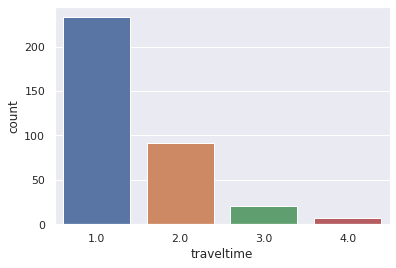

In [1804]:
sns.countplot(df.traveltime)

Большинство учеников тратят на дорогу в школу менее 15 минут. Имеется 21 пропуск. При совместном рассмотрении этого столбца со столбцами 'тип адреса' и 'причина выбора школы', где причиной является близость к дому, можно заполнить некоторые пропуски группируя и анализируя значения в этих столбцах.  

In [1805]:
df[(df.reason == 'home')
   & (df.traveltime > 2)]['address'].value_counts(dropna=False)

R      4
NaN    1
Name: address, dtype: int64

In [1806]:
df[(df.traveltime <= 2)]['address'].value_counts(dropna=False)

U      255
R       59
NaN     11
Name: address, dtype: int64

На основе данных полученных выше, напишем метод по заполнению пустых значений колонки типа адреса учеников. 

In [1807]:
def fill_address(row):
    if row['traveltime'] <= 2 and pd.isnull(row['address']) == True:
        row['address'] = 'U'
    elif row['reason'] == 'home' and row['traveltime'] > 2 and pd.isnull(
            row['address']) == True:
        row['address'] = 'R'
    elif pd.isnull(row['address']) == True:
        row['address'] = 'U'
    return row

In [1808]:
df = df.apply(fill_address, axis=1, result_type='reduce')

Таким же образом попробуем заполнить пропуски в traveltime:

In [1809]:
df[df.address == 'R']['traveltime'].value_counts(dropna=False)

1.0    33
2.0    26
3.0    13
4.0     4
NaN     4
Name: traveltime, dtype: int64

In [1810]:
df[df.address == 'U']['traveltime'].value_counts(dropna=False)

1.0    200
2.0     66
NaN     17
3.0      8
4.0      3
Name: traveltime, dtype: int64

Заметно, что городские ученики добираются с основном менее <15 минут, поэтому у них оставшиеся пропуски можно заменить на это значение, а вот с теми, кто живет за городом, сложней, у них <15 минут добираются не так много, поэтому заменим пропуски на среднее значение.

In [1811]:
def fill_traveltime(row):
    if row['address'] == 'U' and pd.isnull(row['traveltime']) == True:
        row['traveltime'] = mode(df.traveltime)[0][0]
    elif row['address'] == 'R' and pd.isnull(row['traveltime']) == True:
        row['traveltime'] = round(np.mean(df[df.address == 'R']['traveltime']))

    return row

In [1812]:
df = df.apply(fill_traveltime, axis=1, result_type='reduce')

In [1813]:
df.traveltime.value_counts(dropna=False)

1.0    250
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

Таким образом мы заполнили 21 пропуск

In [1814]:
df.studytime.value_counts(dropna=False)

2.0    186
1.0     95
3.0     62
4.0     27
NaN      4
Name: studytime, dtype: int64

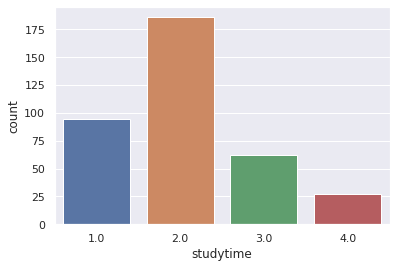

In [1815]:
sns.countplot(df.studytime)

Подавляющее большинство учеников не имеют достаточно времени на учебу вне школы. Имеется 4 пропуска.  

In [1816]:
df.failures.value_counts(dropna=False)

0.0    282
1.0     45
NaN     17
2.0     15
3.0     15
Name: failures, dtype: int64

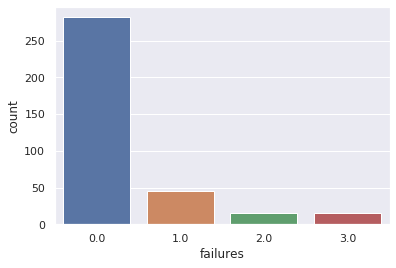

In [1817]:
sns.countplot(df.failures)

В справочной информации к проекту говорится, что значение '0' - это непопадание в диапазон от 1 до 3, поэтому трактовать его однозначно нельзя. Получается, что это либо множество неудач либо их отсутствие. Также имеется 17 пропусков.

In [1818]:
df.schoolsup.value_counts(dropna=False)

no     318
yes     47
NaN      9
Name: schoolsup, dtype: int64

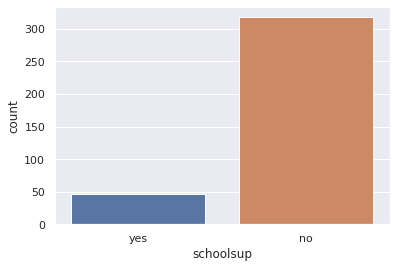

In [1819]:
sns.countplot(df.schoolsup)

Как можно заметить, практически у каждого ученика отсутствует дополнительная образовательная поддержка. В столбце содержатся 9 пропусков. 

In [1820]:
df.famsup.value_counts(dropna=False)

yes    213
no     127
NaN     34
Name: famsup, dtype: int64

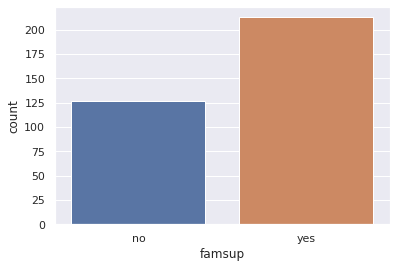

In [1821]:
sns.countplot(df.famsup)

У большинства учеников есть семейная образовательная поддержка, но и у достаточно большого числа учеников ее нет. Имеется 34 пропуска.

In [1822]:
df.paid.value_counts(dropna=False)

no     192
yes    149
NaN     33
Name: paid, dtype: int64

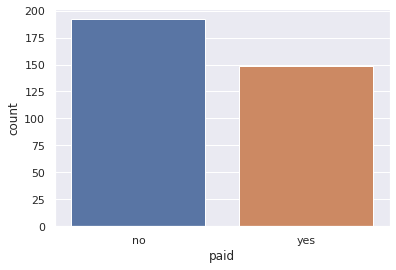

In [1823]:
sns.countplot(df.paid)

Почти половина из учеников имеет дополнительные уроки по математике и большинство не учится без них. Столбец содержит 33 пропуска.

In [1824]:
df.activities.value_counts(dropna=False)

yes    185
no     178
NaN     11
Name: activities, dtype: int64

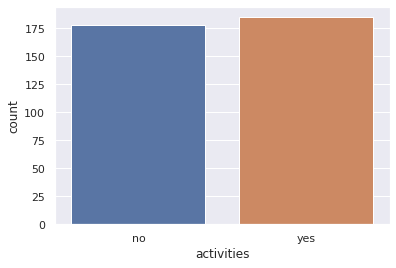

In [1825]:
sns.countplot(df.activities)

Соотношение тех, кто имеет дополнительные внеучебные занятие и не имеею примерно равно 1:1. Имеется 11 пропусков. 

Эти 4 столбца дополнительных внешкольных активностей можно проанализировать совместно со столбцом времени на учебу помимо школы и попробовать заполнить часть данных.

In [1826]:
df.nursery.value_counts(dropna=False)

yes    284
no      74
NaN     16
Name: nursery, dtype: int64

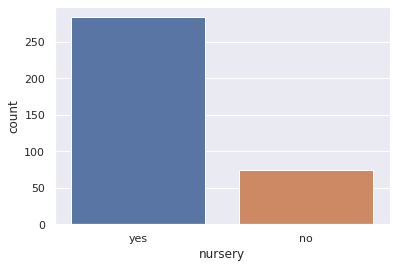

In [1827]:
sns.countplot(df.nursery)

Подавляющее большинство учеников посещали детский сад. Имеется 16 пропусков.

In [1828]:
df.higher.value_counts(dropna=False)

yes    339
NaN     18
no      17
Name: higher, dtype: int64

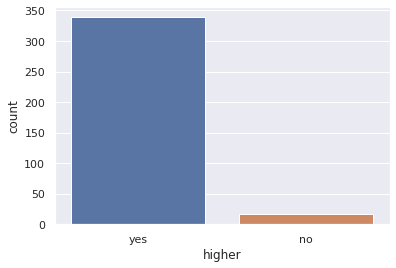

In [1829]:
sns.countplot(df.higher)

Почти все ученики хотят в будущем получить высшее образование. Имеется 20 пропущенных значений, которые в данном раскладе можно заполнить самым популярным значением, так как этим в случае ошибки мы не сильно изменим соотношении двух категорий. К тому же в вероятность ошибки всего лишь 0.05 и при заполнении пустых 18 значений мы скорее всего допустим только одну ошибку. 

In [1830]:
df.internet.value_counts(dropna=False)

yes    287
no      56
NaN     31
Name: internet, dtype: int64

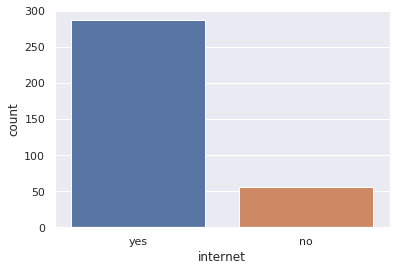

In [1831]:
sns.countplot(df.internet)

Несмотря на то,что у многих учеников интернет есть, достаточно большая доля его не имеет. В данных также имеется 31 пропуск.

In [1832]:
df.romantic.value_counts(dropna=False)

no     232
yes    119
NaN     23
Name: romantic, dtype: int64

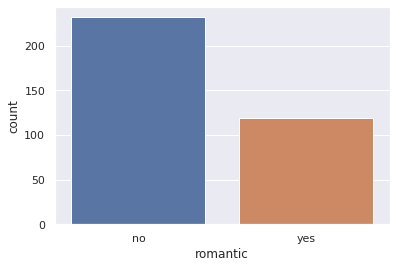

In [1833]:
sns.countplot(df.romantic)

Соотношение тех кто имеет и не имеет романтические отношения 1:2. В столбце 23 пропуска.

In [1834]:
display(df.famrel.value_counts(dropna=False))
df = df.loc[(df.famrel >= 1) | pd.isnull(df.famrel)]

 4.0    176
 5.0     90
 3.0     60
 NaN     23
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

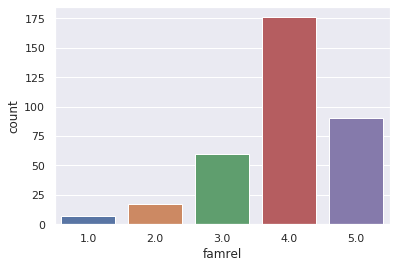

In [1835]:
sns.countplot(df.famrel)

У достаточно большого числа учеников отношения в семье оставлют желать лучшего. Есть один выброс, который не укладывается в логический диапазон, поэтому избавляемся от него. Имеется 23 пропуска, которые можно заполнить в рассмотрении этих данных вместе со столбцом  совместного проживания родителей.

In [1836]:
df[df.Pstatus == 'A']['famrel'].value_counts(dropna=False)

4.0    11
5.0    10
3.0     5
NaN     4
2.0     3
1.0     1
Name: famrel, dtype: int64

Рассмотрение этих столбцов вместе ничего нам не дает, так как даже в семьях, где родители живут раздельно отношения в семье все равно в основном хорошие. Поэтому заполним пропуски модой этого столбца.

In [1837]:
df.famrel.fillna(mode(df.famrel)[0][0], inplace=True)

In [1838]:
df.freetime.value_counts(dropna=False)

3.0    147
4.0    108
2.0     58
5.0     35
1.0     16
NaN      9
Name: freetime, dtype: int64

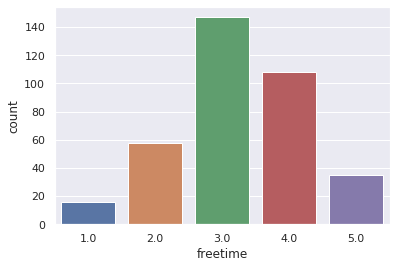

In [1839]:
sns.countplot(df.freetime)

Свободное время у большинства учеников есть. Имеетя 9 пропусков, которые можно заполнить рассматиривая столбец вместе со столбцами доп. времени на учебу и наличия дополнительных внеучебных активностей.

In [1840]:
df[(df.paid == 'yes') |
   (df.activities == 'yes')]['freetime'].value_counts(dropna=False)

3.0    105
4.0     72
2.0     40
5.0     25
1.0     11
NaN      6
Name: freetime, dtype: int64

In [1841]:
df[(df.paid == 'yes')
   & (df.activities == 'yes')]['freetime'].value_counts(dropna=False)

3.0    26
4.0    20
2.0    16
5.0    10
1.0     1
NaN     1
Name: freetime, dtype: int64

Рассмотрение этих столбцов вместе ничего не дает, так как даже ученики со всеми видами доп. активностей в среднем имеют такое же количество свободного времени, как и остальные.

In [1842]:
df.goout.value_counts(dropna=False)

3.0    122
2.0     91
4.0     80
5.0     49
1.0     23
NaN      8
Name: goout, dtype: int64

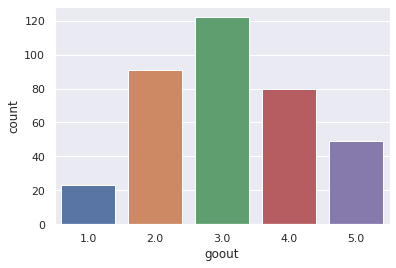

In [1843]:
sns.countplot(df.goout)

В основном ученики проводят умеренное количество времени с друзьями. Имеются 8 пропусков.

In [1844]:
df.health.value_counts(dropna=False)

5.0    127
3.0     87
4.0     60
1.0     44
2.0     42
NaN     13
Name: health, dtype: int64

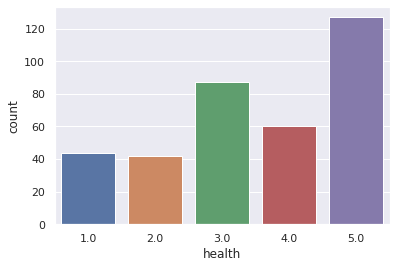

In [1845]:
sns.countplot(df.health)

Немало учеников с пролемами со здоровьем, но все же у большинства серьезных проблем нет. Имеется 13 пропусков.

In [1846]:
df.absences.value_counts(dropna=False)

0.0      108
2.0       55
4.0       50
6.0       28
8.0       21
10.0      16
12.0      12
NaN       11
14.0       9
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
1.0        3
22.0       2
13.0       2
15.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
212.0      1
28.0       1
21.0       1
75.0       1
19.0       1
38.0       1
40.0       1
23.0       1
11.0       1
17.0       1
24.0       1
Name: absences, dtype: int64

(0, 50)

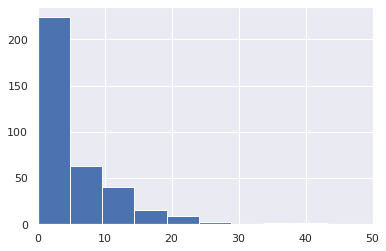

In [1847]:
df.absences.hist(bins=80)
plt.xlim((0, 50))

На графике видно, что чем больше пропусков, тем меньше студентов, которые имеют такую посещаемость.

(0, 400)

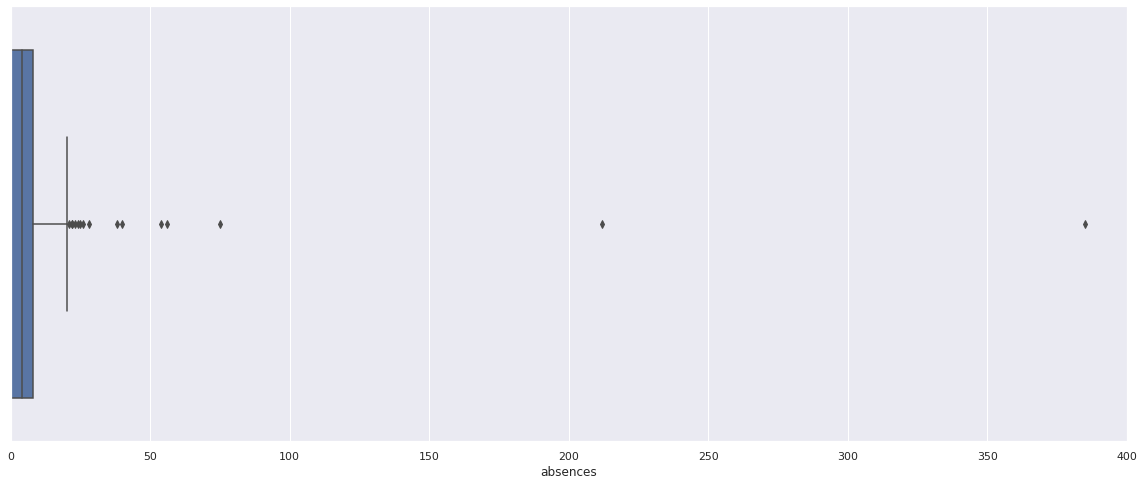

In [1848]:
fig = plt.figure(figsize=(20, 8))
sns.boxplot(df.absences)
plt.xlim((0, 400))

На графике заметно наличие двух значительных выбросов, от которых следует избавиться, и множество более приближенных к реальным значениям, избавимся от значений больше 30 и отсечем 5 выбросов, сильно влияющих на показатель среднего. 

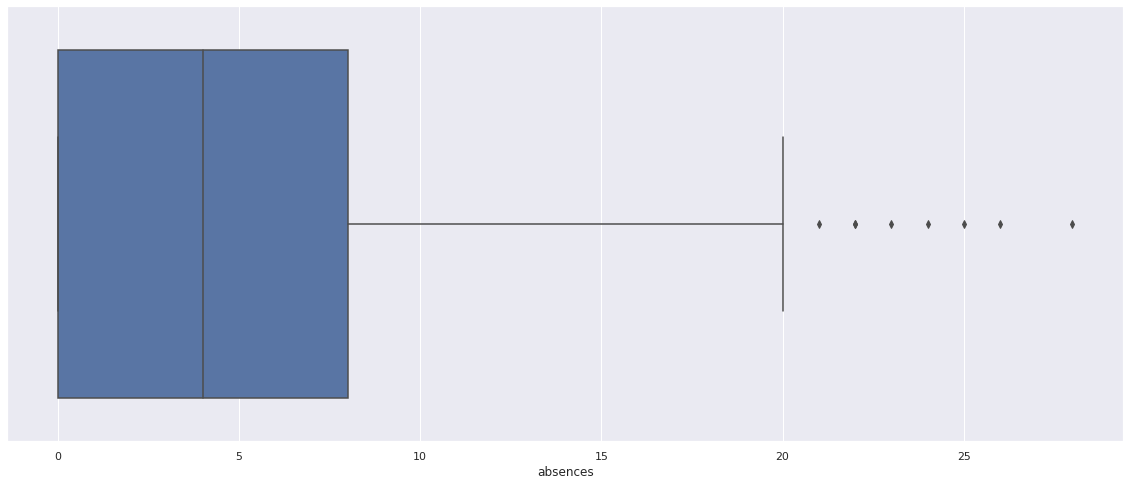

In [1849]:
df = df.loc[(df.absences < 30) | pd.isnull(df.absences)]
fig = plt.figure(figsize=(20, 8))
sns.boxplot(df.absences)

Теперь, что касается остальных выбросов, они выглядят более правдоподобно, несмотря на значения более 50. Также имеется 11 пропусков. Есть возможность их заполнить, если посмотреть на столбец проблем со здоровьем и желание получить высшее образование.

In [1850]:
display(df[df.higher == 'no']['absences'].mean(),
        df[df.higher == 'yes']['absences'].mean())

5.071428571428571

5.040247678018575

In [1851]:
display(df[(df.health <= 3)]['absences'].mean(),
        df[df.health > 3]['absences'].mean())

5.385542168674699

4.704545454545454

In [1852]:
display(df[(df.health <= 3)]['absences'].median(),
        df[df.health > 3]['absences'].median())

4.0

3.0

Как можно заметить, наличие желания получить высшее образование не влияет на посещаемость в отличии от состояния здоровья. Из этого можно слелать вывод, что ученики, желающие получить высшее образование не всегда надеятся на школьное образование и предпочитают дополнительное образование.

In [1853]:
df[df.health > 3]['absences'].value_counts(dropna=False)

0.0     56
2.0     30
4.0     24
6.0     15
8.0     10
NaN      7
10.0     5
16.0     5
12.0     5
7.0      4
14.0     4
18.0     3
5.0      3
20.0     2
15.0     2
3.0      2
9.0      2
23.0     1
28.0     1
13.0     1
1.0      1
Name: absences, dtype: int64

In [1854]:
def fill_absences(row):
    if row['health'] > 3 and pd.isnull(row['absences']) == True:
        row['absences'] = df[(df.health > 3)]['absences'].median()
    elif row['health'] <= 3 and pd.isnull(row['absences']) == True:
        row['absences'] = df[(df.health <= 3)]['absences'].median()
    elif pd.isnull(row['absences']) == True:
        row['absences'] = df.absences.median()
    return row

In [1855]:
df = df.apply(fill_absences, axis=1, result_type='reduce')

In [1856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      366 non-null    object 
 1   sex         366 non-null    object 
 2   age         366 non-null    int64  
 3   address     366 non-null    object 
 4   famsize     343 non-null    object 
 5   Pstatus     334 non-null    object 
 6   Medu        364 non-null    float64
 7   Fedu        346 non-null    float64
 8   Mjob        350 non-null    object 
 9   Fjob        338 non-null    object 
 10  reason      351 non-null    object 
 11  guardian    337 non-null    object 
 12  traveltime  366 non-null    float64
 13  studytime   362 non-null    float64
 14  failures    349 non-null    float64
 15  schoolsup   357 non-null    object 
 16  famsup      334 non-null    object 
 17  paid        333 non-null    object 
 18  activities  355 non-null    object 
 19  nursery     350 non-null    o

In [1857]:
df.score.value_counts(dropna=False)

50.0     51
55.0     40
0.0      35
75.0     31
60.0     29
65.0     28
70.0     27
40.0     26
45.0     25
80.0     15
30.0     15
90.0     12
35.0      9
NaN       6
25.0      5
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

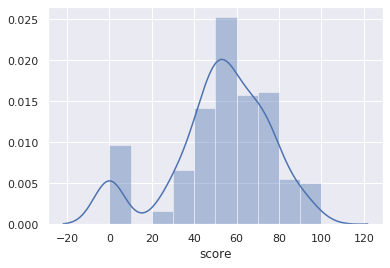

In [1858]:
sns.distplot(df.score, bins=10)

Примечательно, что между значениями 0 и 20 есть разрыв, при том ,что есть всего лишь один ученик с 20 баллами и целых 33 с нулем. Это может говорить о том, что 0 баллов у тех, кто либо не явился на экзамен, либо не допущен к нему. Если исключить результаты с нулем баллов, то распределение будет похоже на нормальное.  

Этот столбец является целевым для будущей модели, поэтому пропуски в нем недопустимы и от них следует избавиться.

In [1859]:
df.dropna(how='any', subset=['score'], inplace=True)

Проведем корреляционный анализ численных переменных:

In [1860]:
df[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.138160,-0.143789
absences,0.138160,1.000000,0.082978
score,-0.143789,0.082978,1.000000


In [1861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      360 non-null    object 
 1   sex         360 non-null    object 
 2   age         360 non-null    int64  
 3   address     360 non-null    object 
 4   famsize     337 non-null    object 
 5   Pstatus     328 non-null    object 
 6   Medu        358 non-null    float64
 7   Fedu        340 non-null    float64
 8   Mjob        344 non-null    object 
 9   Fjob        332 non-null    object 
 10  reason      345 non-null    object 
 11  guardian    331 non-null    object 
 12  traveltime  360 non-null    float64
 13  studytime   356 non-null    float64
 14  failures    343 non-null    float64
 15  schoolsup   351 non-null    object 
 16  famsup      329 non-null    object 
 17  paid        328 non-null    object 
 18  activities  349 non-null    object 
 19  nursery     345 non-null    o

Нет ни одной пары признаков с корреляцией, приближенной к 1, значит нет столбцов, которые можно исключить. С другой стороны, столбцы age и absences слабо коррелируют с целевым столбцом score, а это значит что они не оказывают сильного влияния на итоговую оценку и польза от столбца пропущенных занятий небольшая. 

Также проведем анализ номинативных переменных: посмотрим на графики распределения и проведем тест Стьюдента для нахождения значимых переменных.

In [1862]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column,
                y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

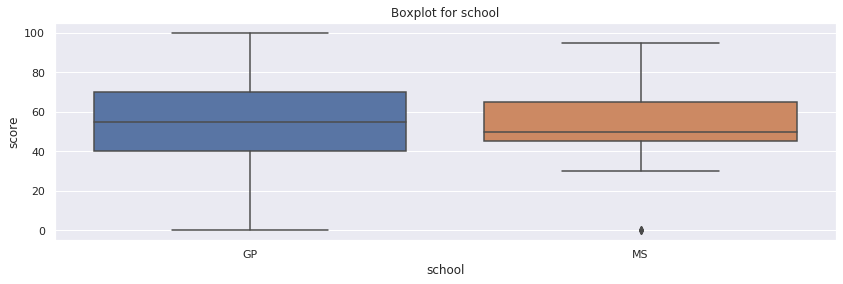

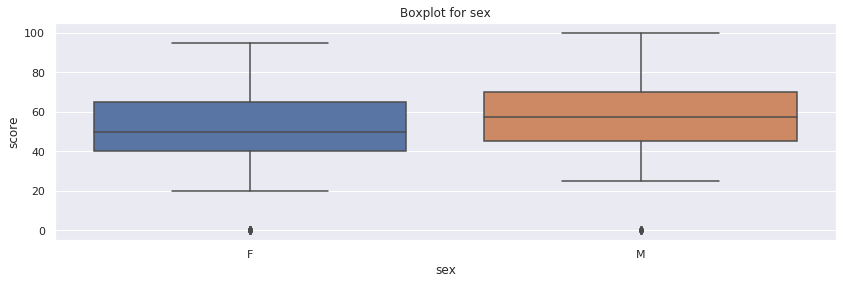

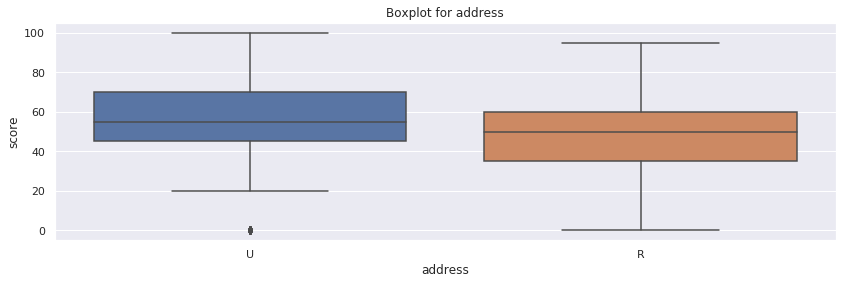

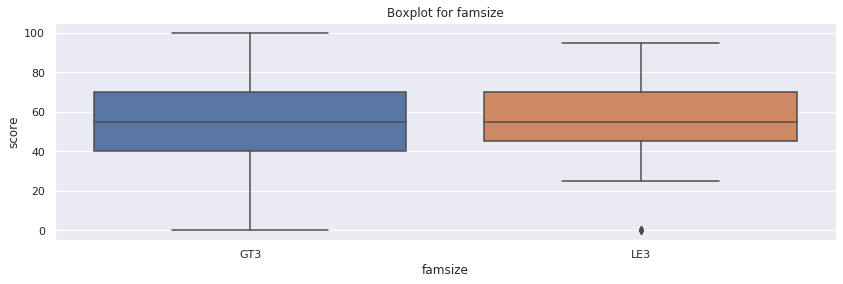

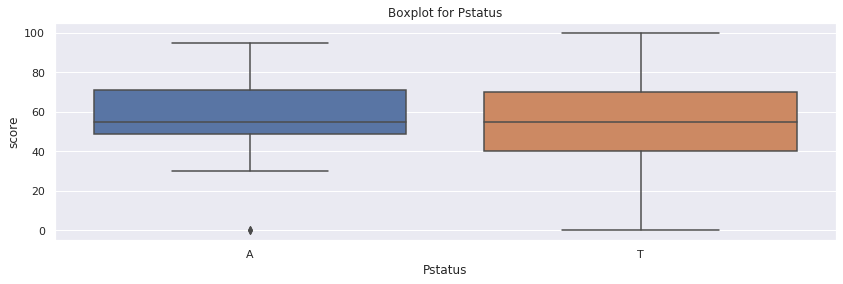

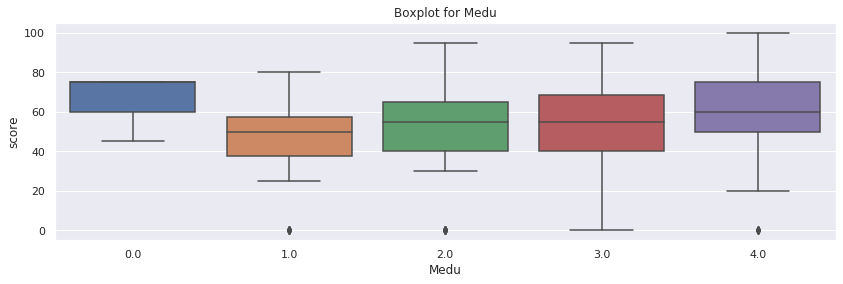

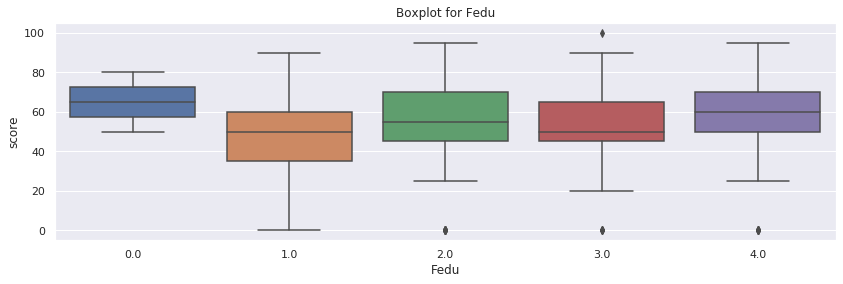

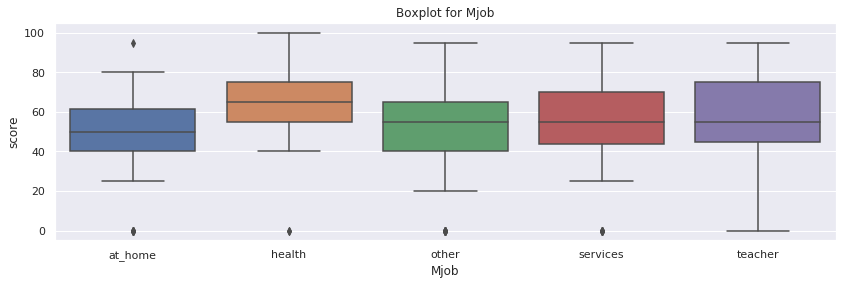

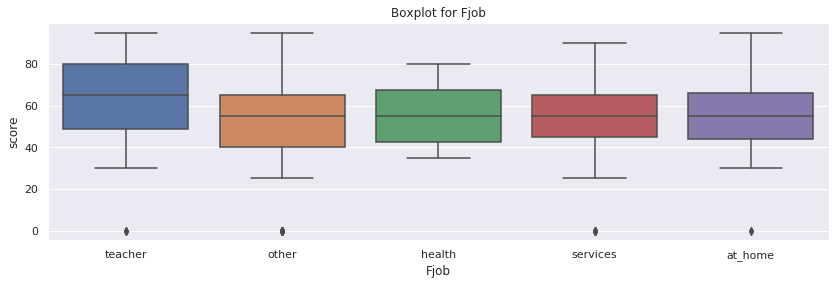

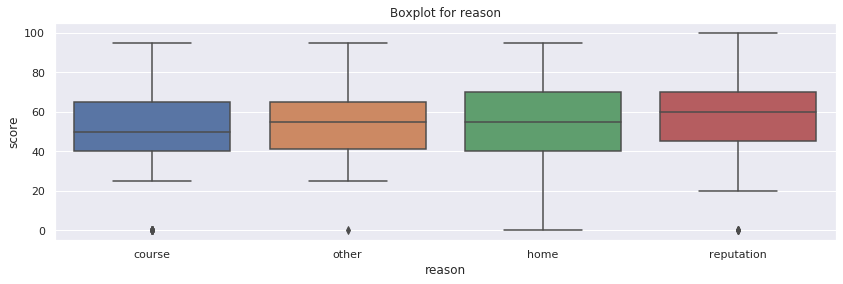

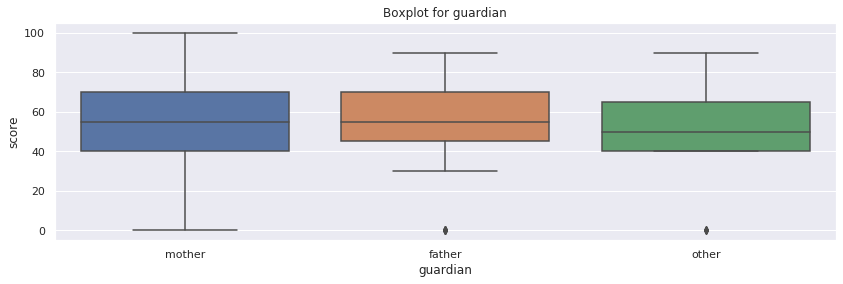

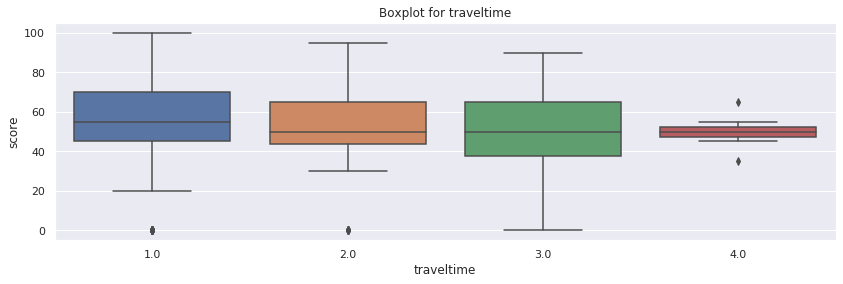

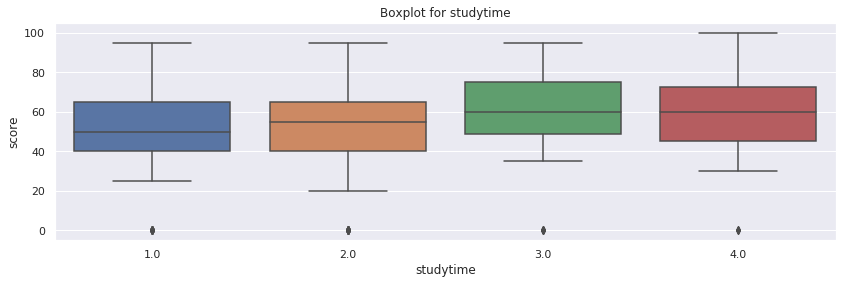

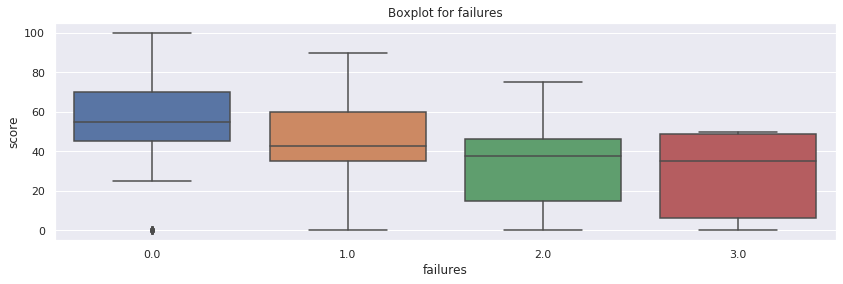

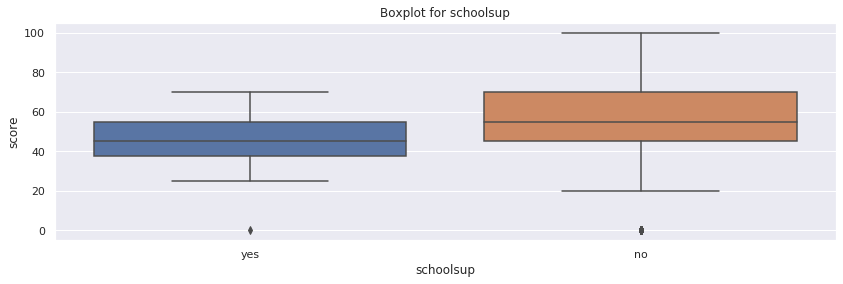

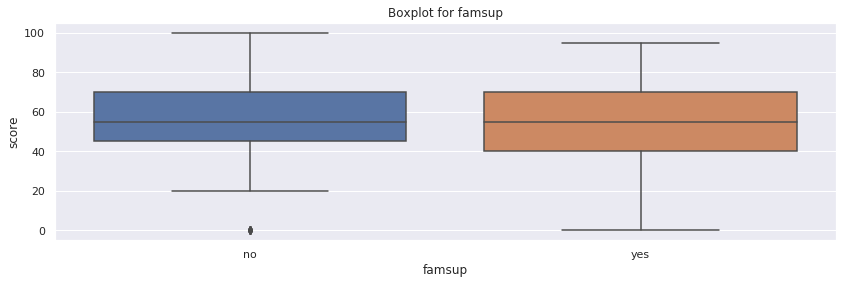

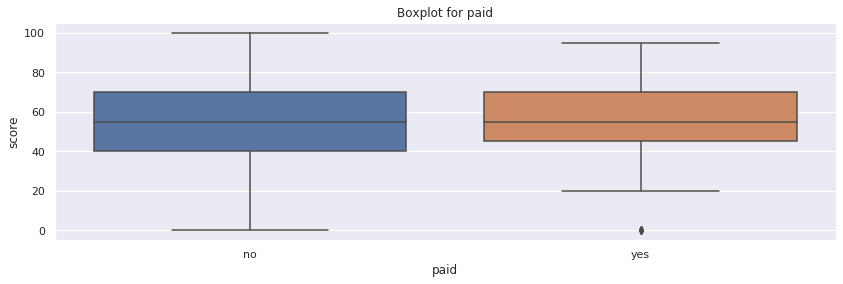

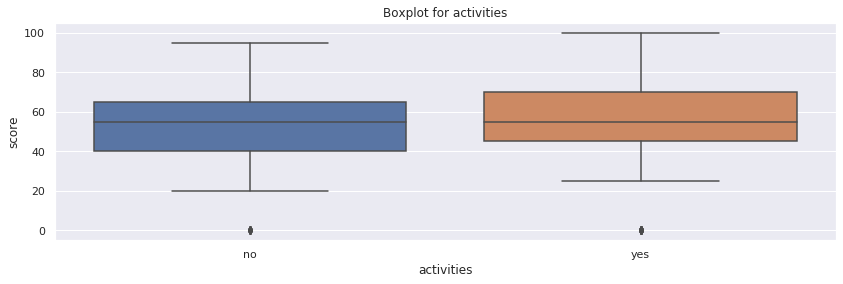

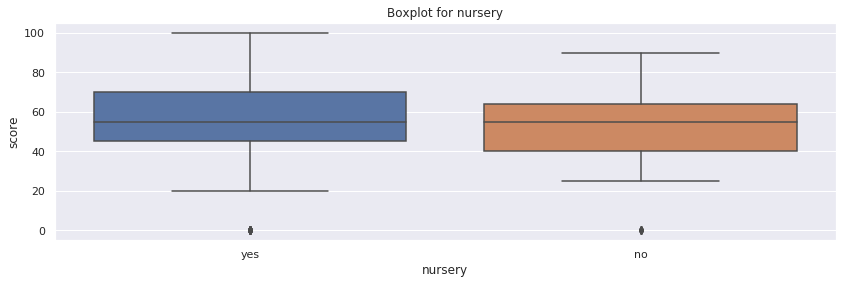

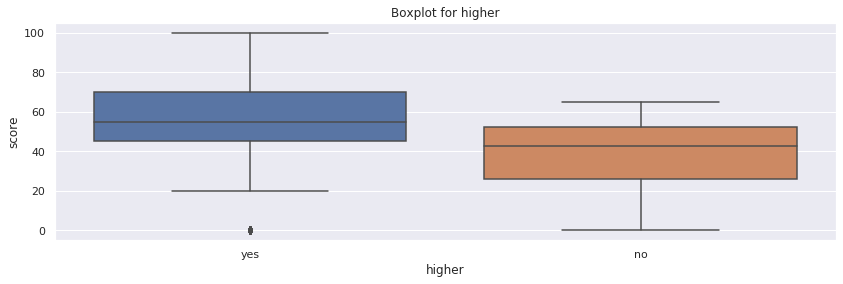

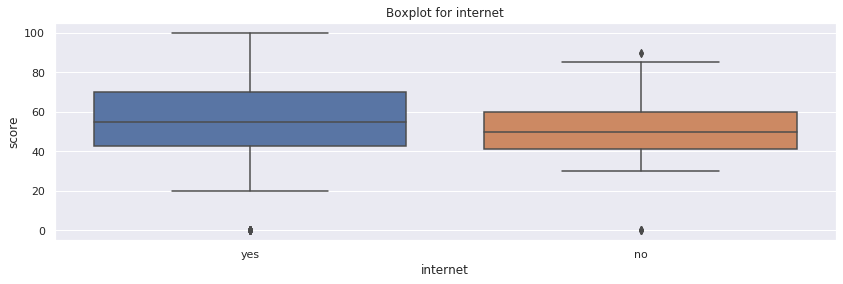

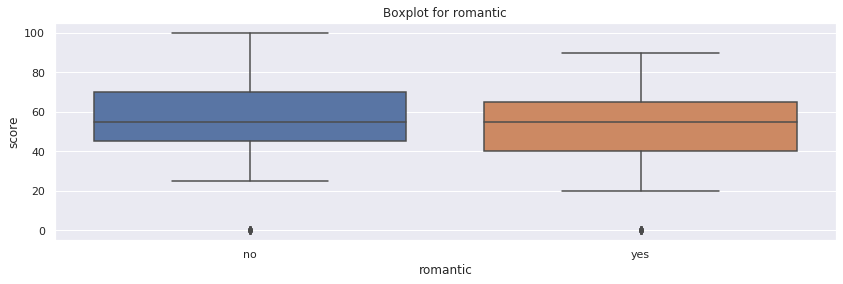

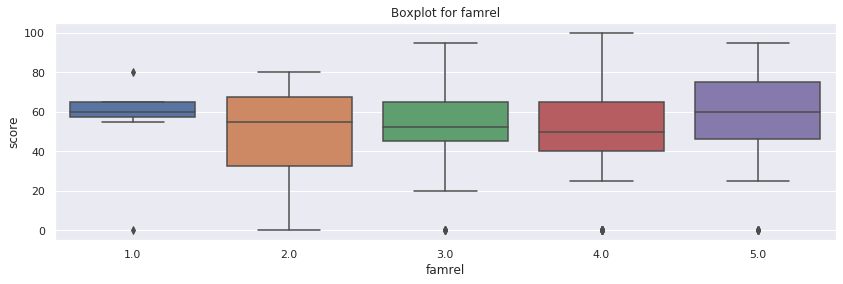

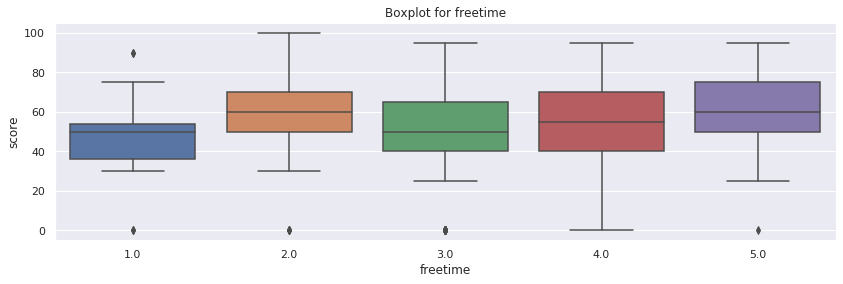

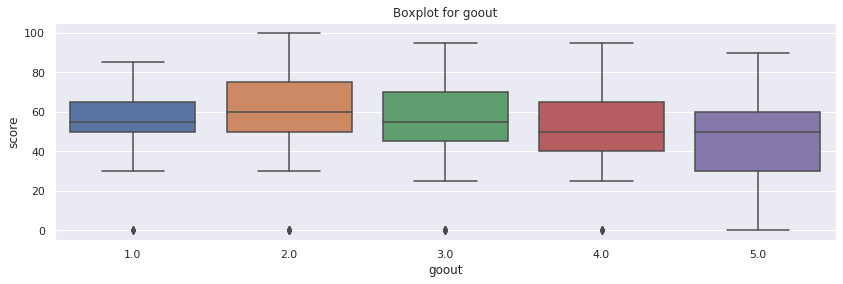

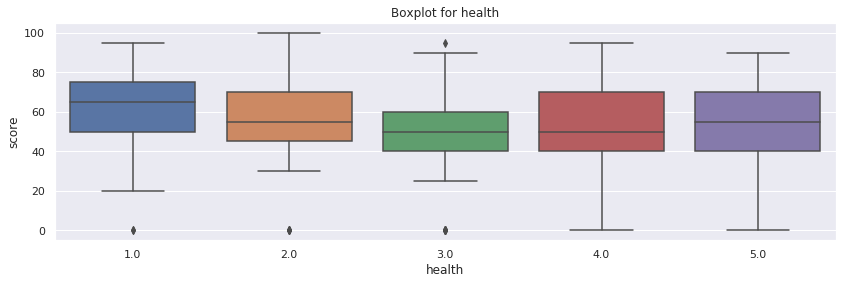

In [1863]:
for col in [
        'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
        'health'
]:
    get_boxplot(col)

По графику сразу можно примерно понять, какие перменные с разными значениями имеют одинаковое распределение. От таких столбцов необходимо избавиться, так как они не несут пользы для определения целевой переменной.

Но для большей точности лучше провести тест Стьюдента и выявить значимые столбцы. В качестве нулевой гипотезы будет равенство среднего значения переменной score при разных значениях в других столбцах. Таким образом, если p-value попадает в предел 0.1, то мы имеем право отвергнуть нулевую гипотезу о равенстве средних значений score для попарно разных значений столбца. В итоге, столбцы, в которых можно отвергнуть нулевую гипотезу, являются полезными для нас.   

In [1864]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.1/len(combinations_all):
            print('Найдены статистически значимые различия для колонки',
                  column)
            break

In [1865]:
for col in [
        'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
        'health'
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


In [1866]:
#скопируем датафрейм со всеми колонками до удаления, т.к. он пригодится позже
full_df = df.copy()
df.drop(axis=1,
        columns=[
            'school', 'famsize', 'Pstatus', 'Fedu', 'Fjob', 'reason',
            'guardian', 'traveltime', 'studytime', 'famsup', 'activities',
            'nursery', 'internet', 'famrel', 'freetime', 'health'
        ],
        inplace=True)

Итоговая доля пропущенных элементов в датасете:

In [1867]:
df.isna().sum().sum() / (len(df) * 13)

0.026495726495726495

Можно заметить, что доля пропущенных значений стала в 2 раза меньше.

В итоге осталось 13 столбцов и 373 строки 

In [1868]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        360 non-null    object 
 1   age        360 non-null    int64  
 2   address    360 non-null    object 
 3   Medu       358 non-null    float64
 4   Mjob       344 non-null    object 
 5   failures   343 non-null    float64
 6   schoolsup  351 non-null    object 
 7   paid       328 non-null    object 
 8   higher     342 non-null    object 
 9   romantic   337 non-null    object 
 10  goout      353 non-null    float64
 11  absences   360 non-null    float64
 12  score      360 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 39.4+ KB


In [1869]:
df[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.138160,-0.143789
absences,0.138160,1.000000,0.082978
score,-0.143789,0.082978,1.000000


Если посмотреть на корреляцию возраста и баллов по экзамену, можно заметить, что чем старше ученик, тем хуже он сдает экзамен. Возможно, потому что все самые старшие ученики - это те, кто оставался на второй год и имеет проблемы с обучением, к тому же, видно, что посещения зависят от возраста и чем старше ученик, тем больше он пропускает.

Что касается посещений, то, как ни странно, чем больше пропусков тем лучше ученики сдают экзамены, хоть и зависимость эта очень маленькая.

Поэтому, следует воспользоваться предыдущими рассуждениями об учениках с 0 баллов по экзамену(это те, кто, скорее всего, либо не явился на экзамен, либо по разным причинам не получил к нему допуск) и не учитывать их.

In [1870]:
df[df.score > 0][['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.182595,-0.114119
absences,0.182595,1.000000,-0.199472
score,-0.114119,-0.199472,1.000000


Действительно, совсем другой результат получился при исключении этих строк.

Поэтому воспользумся заранее скопированным датафреймом до удаления столбцов - full_df и заново проведем тест Стьюдента, но уже без строк, где score = 0 

In [1871]:
del df
df = full_df[full_df.score > 0].copy()
del full_df

In [1872]:
for col in [
        'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
        'health'
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки health


Как можно заметить, теперь статистически значимых номинативных переменных стало больше, но некоторые в этот раз тест не прошли.

In [1873]:
df.drop(axis=1,
        columns=[
            'school', 'famsize', 'Pstatus', 'reason', 'guardian', 'traveltime',
            'paid', 'famsup', 'activities', 'nursery', 'internet', 'famrel',
            'freetime', 'romantic'
        ],
        inplace=True)

После всех преобразований датафрейм теперь выглядит более логично, посещения теперь коррелируют с результатом так, как и должно быть на самом деле. Работа и образование отцов также важны, как и у матерей, время на учебу помимо школы теперь тоже играет роль в определении переменной score,поэтому этот вариант датафрейма я считаю наиболее правильным.